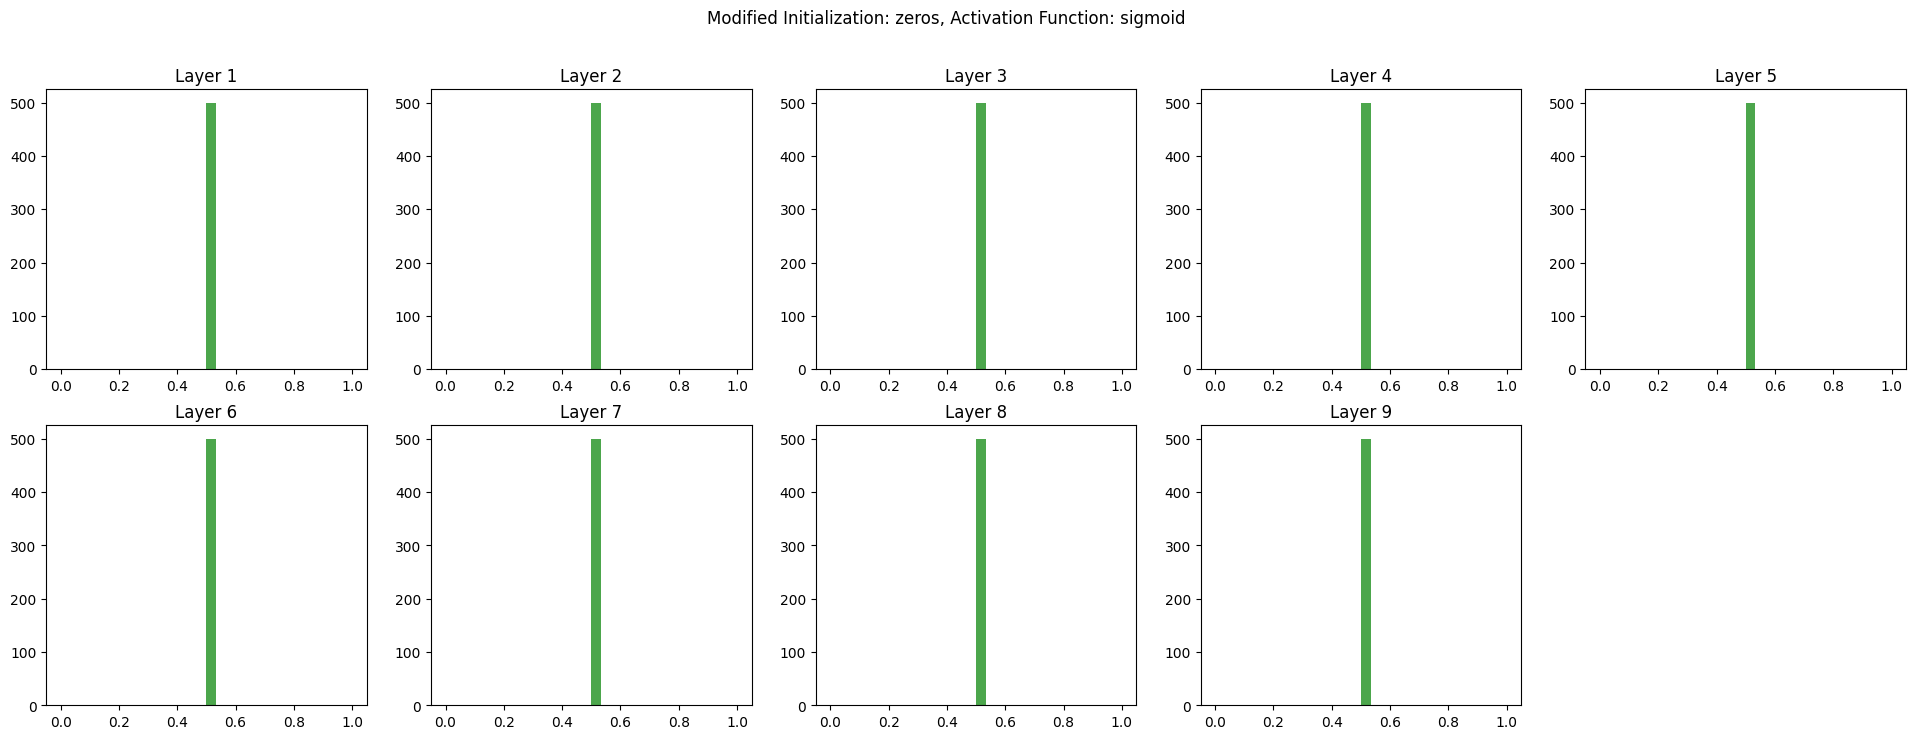

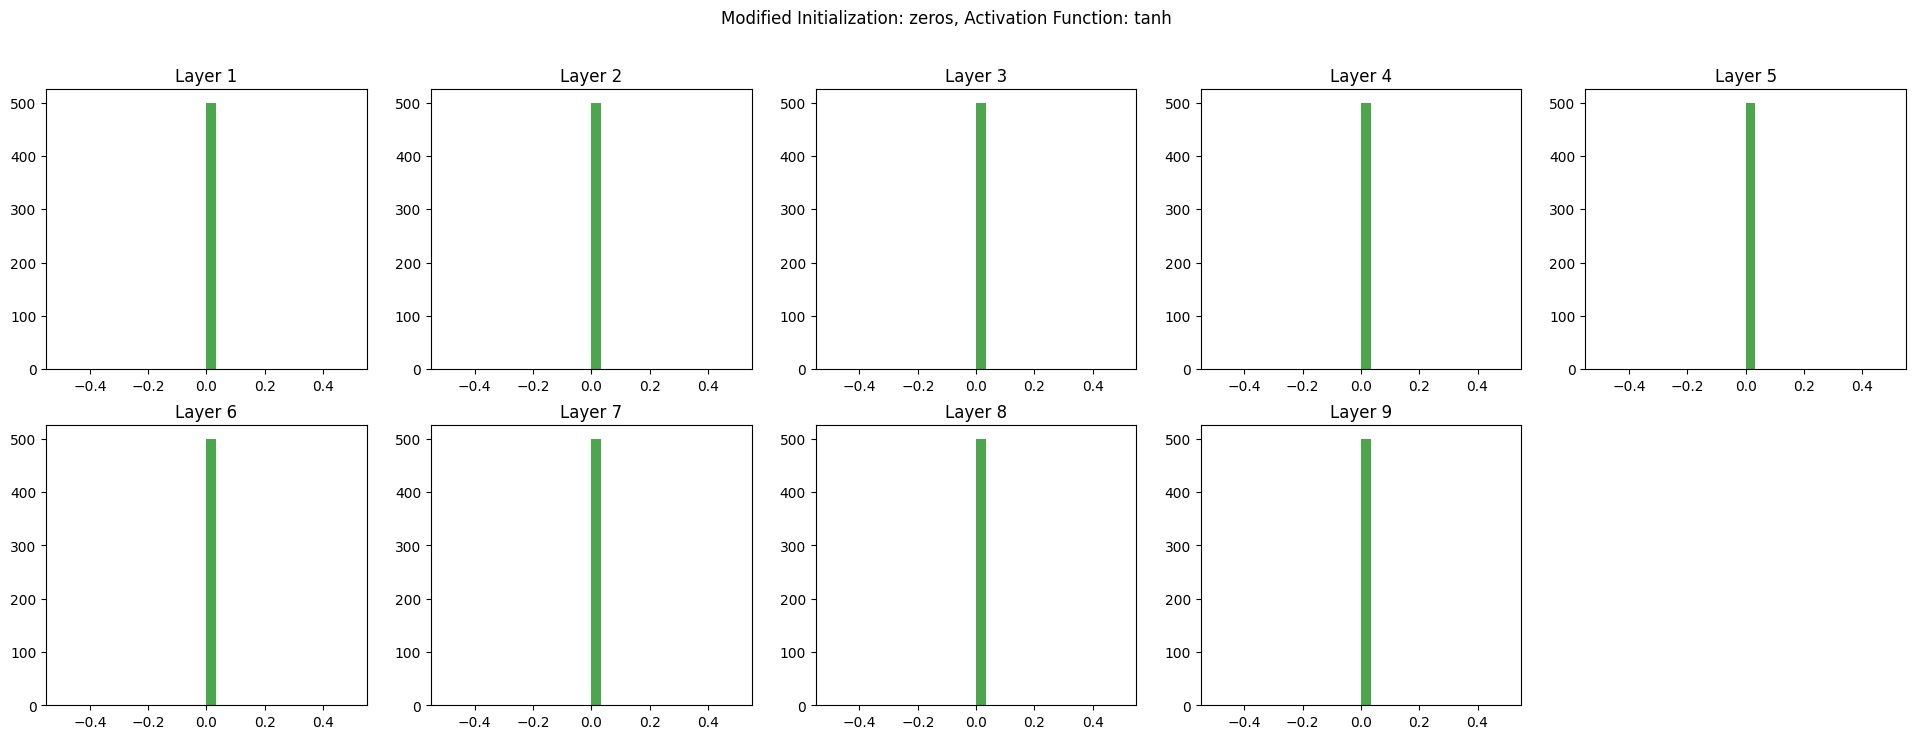

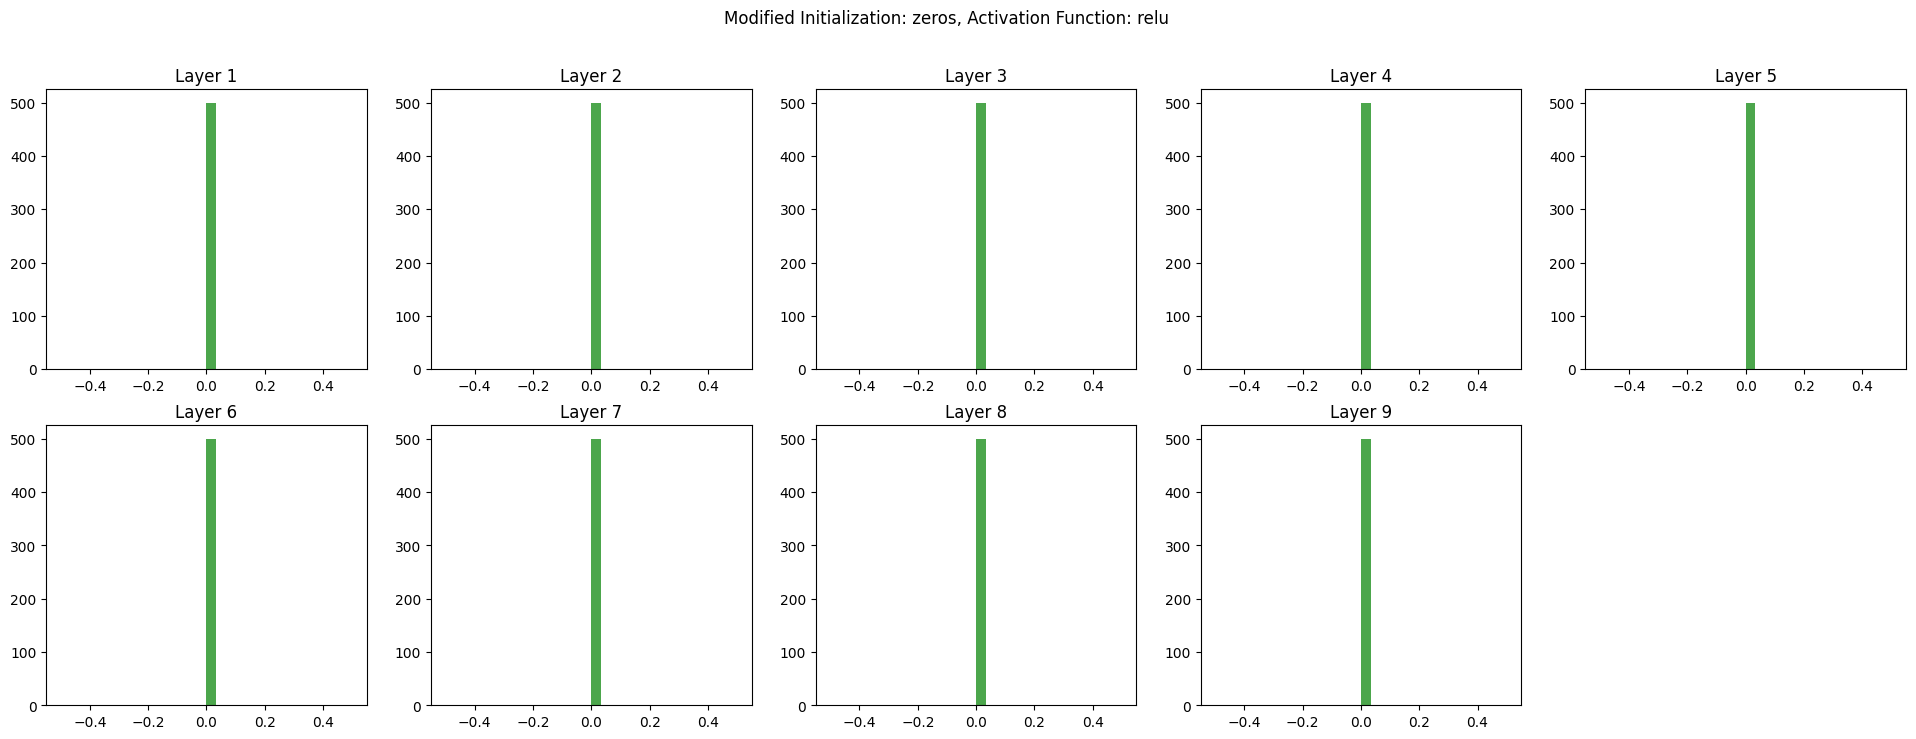

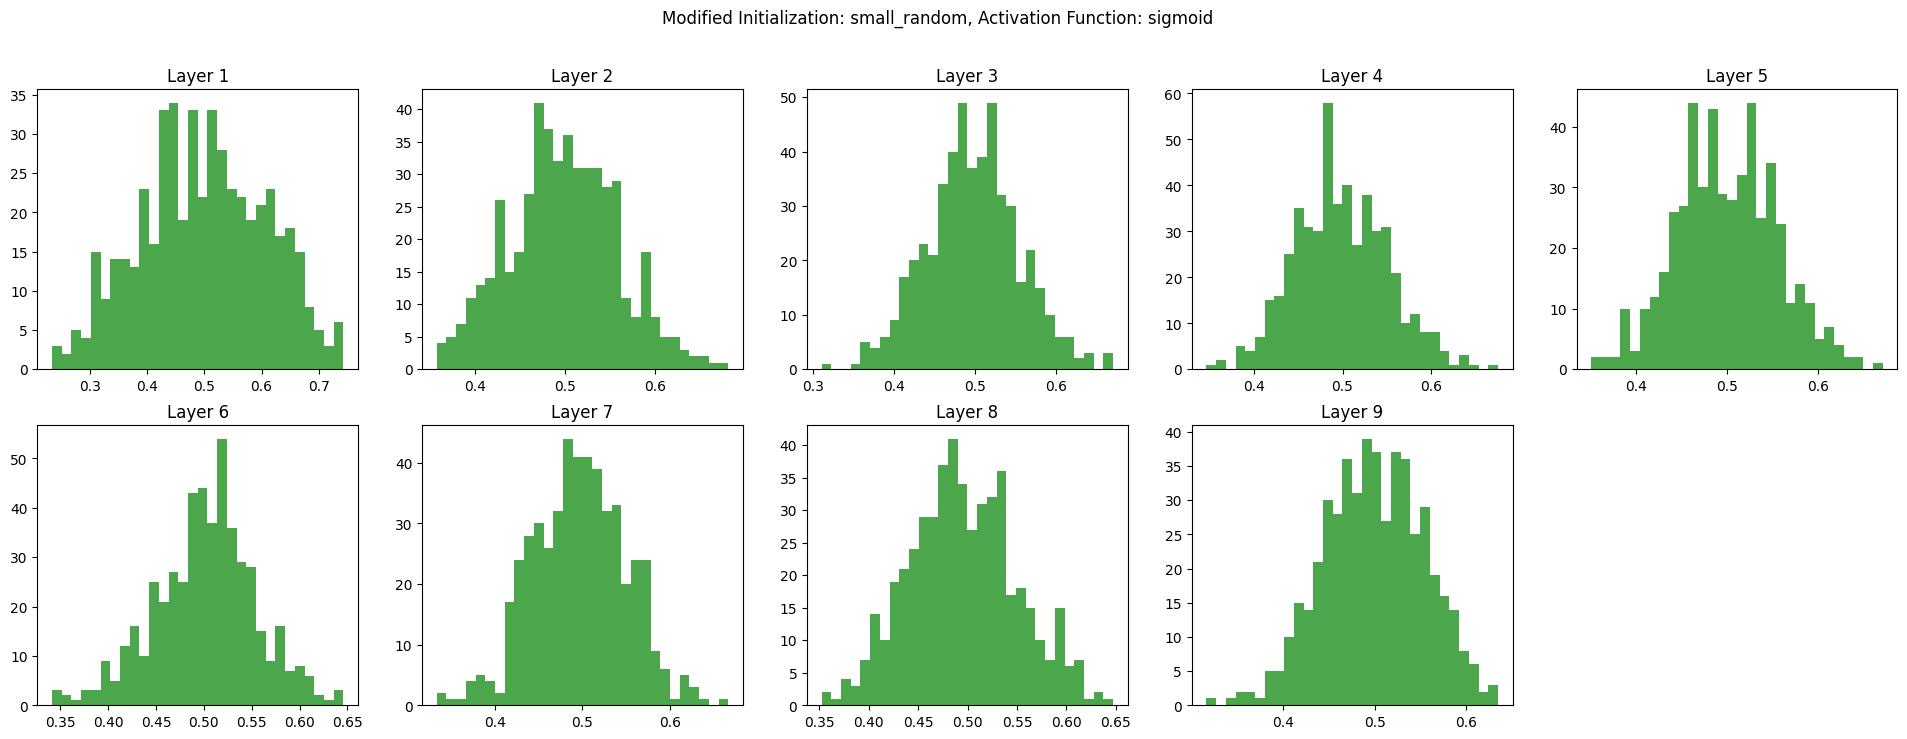

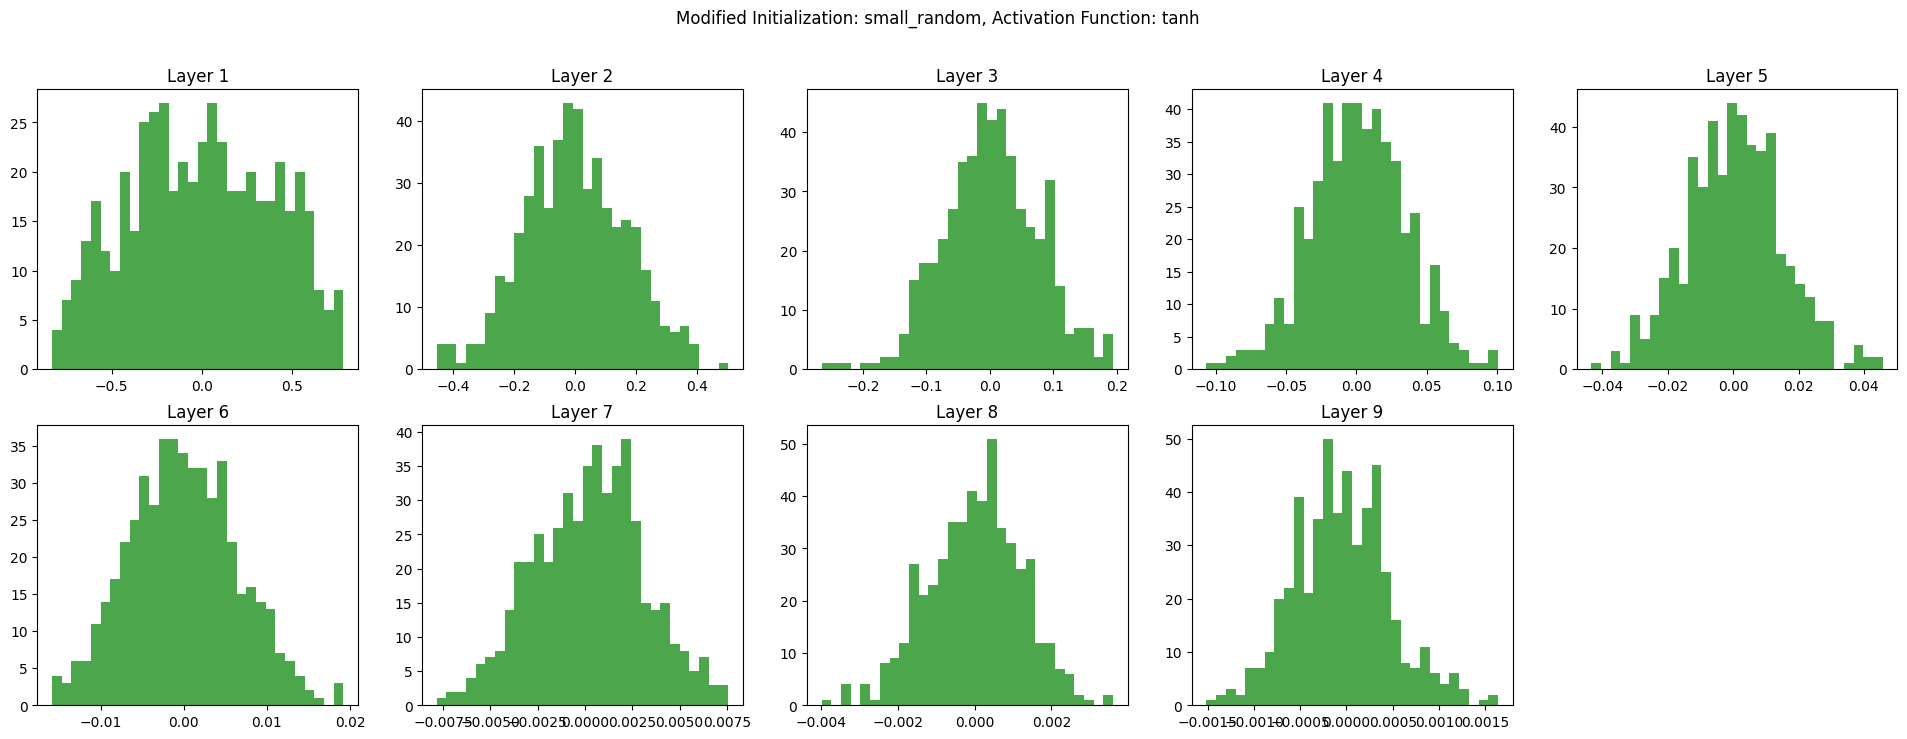

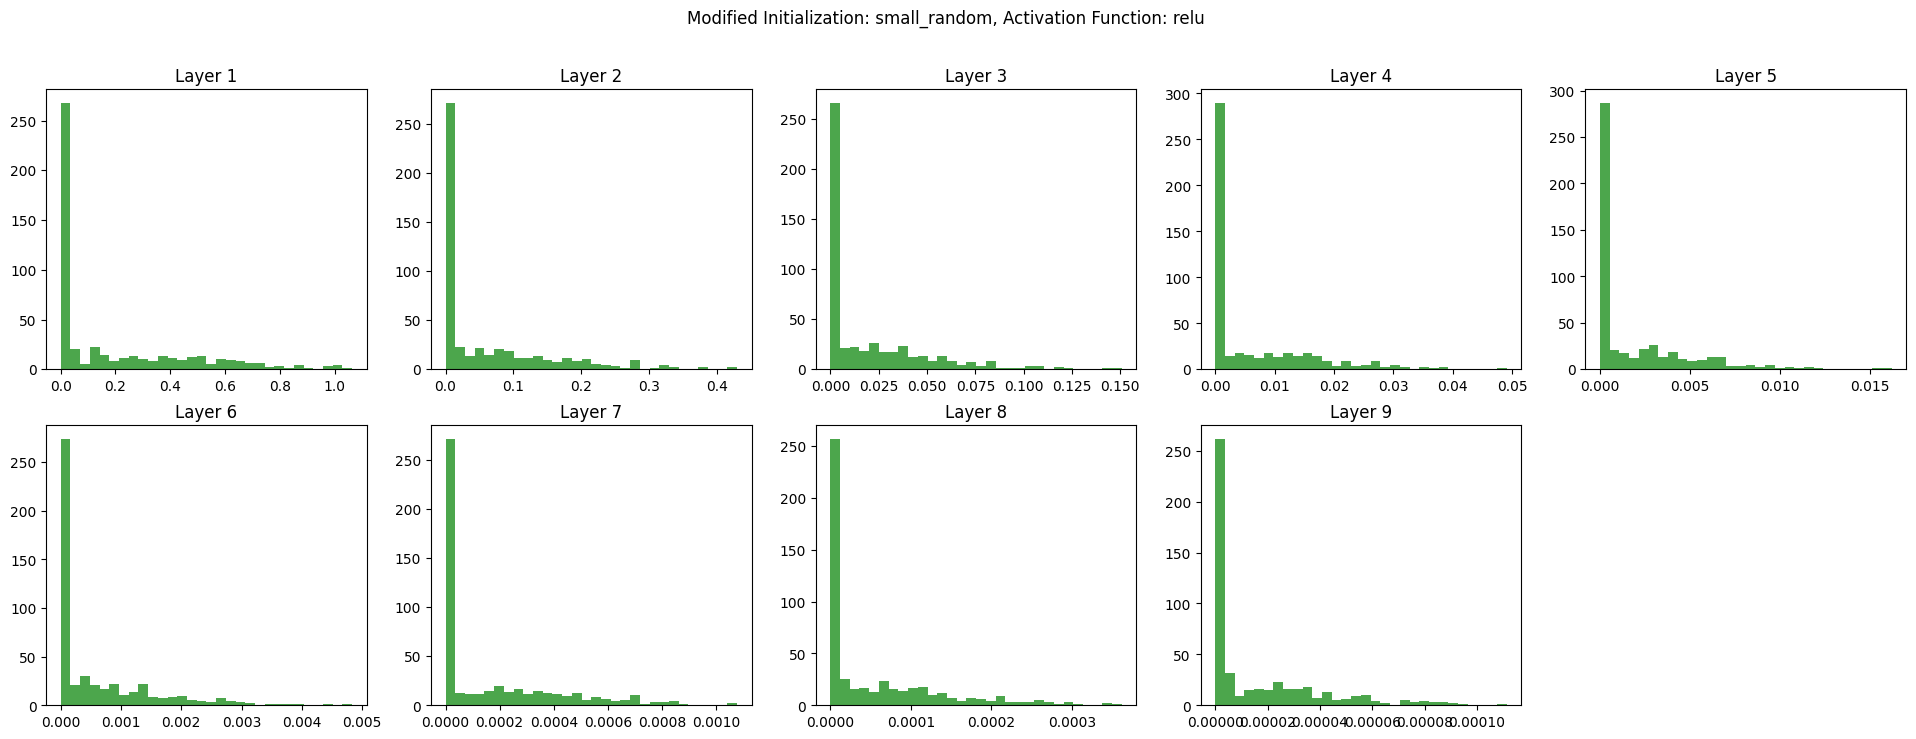

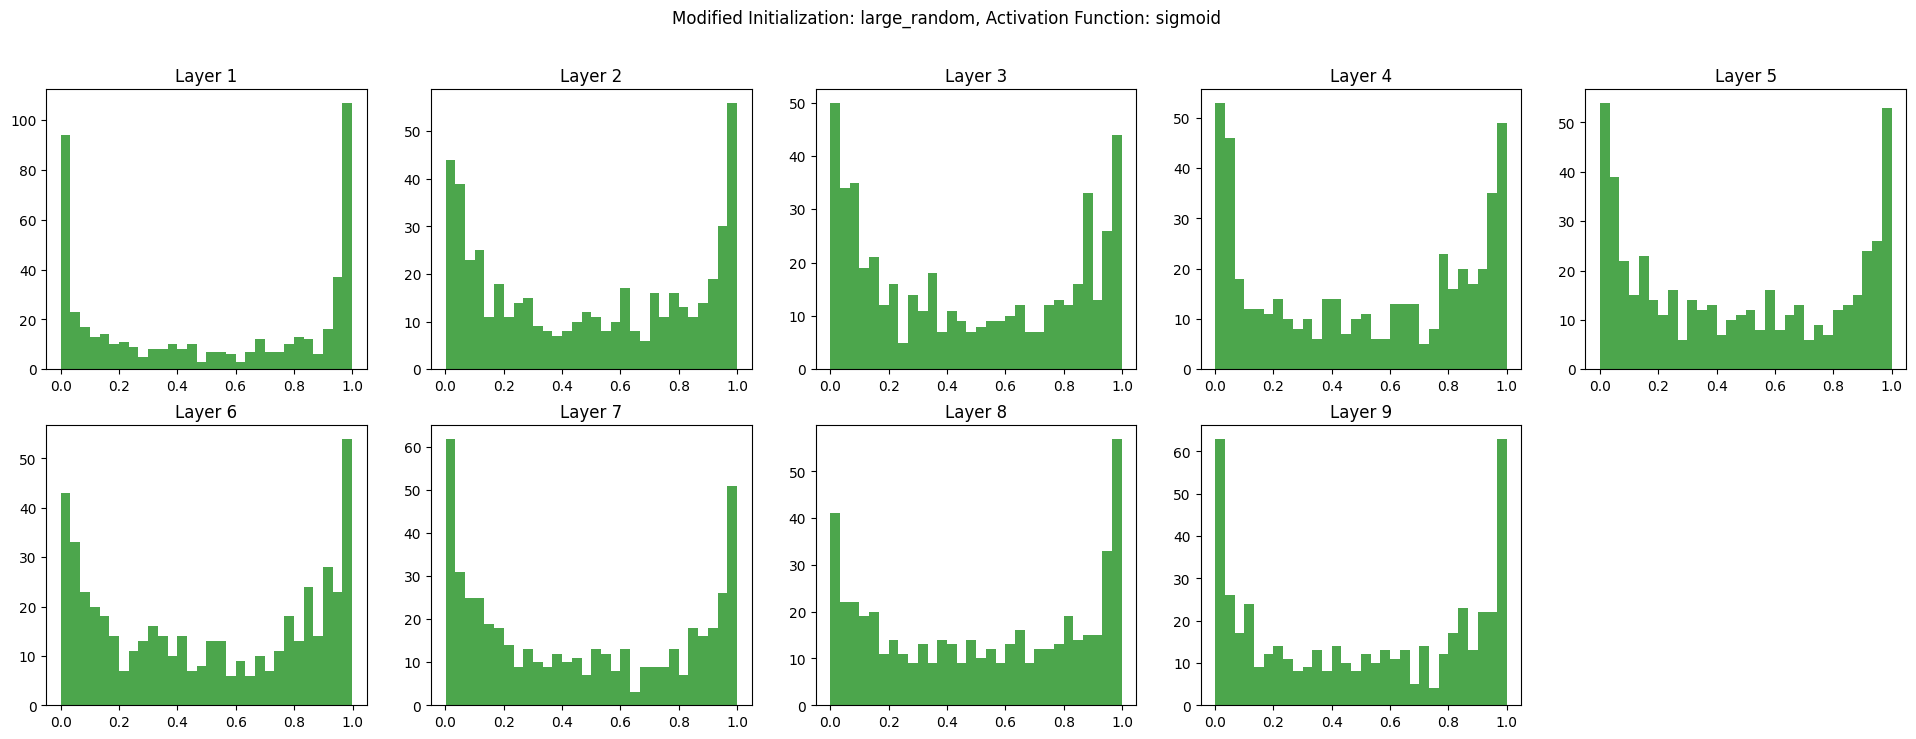

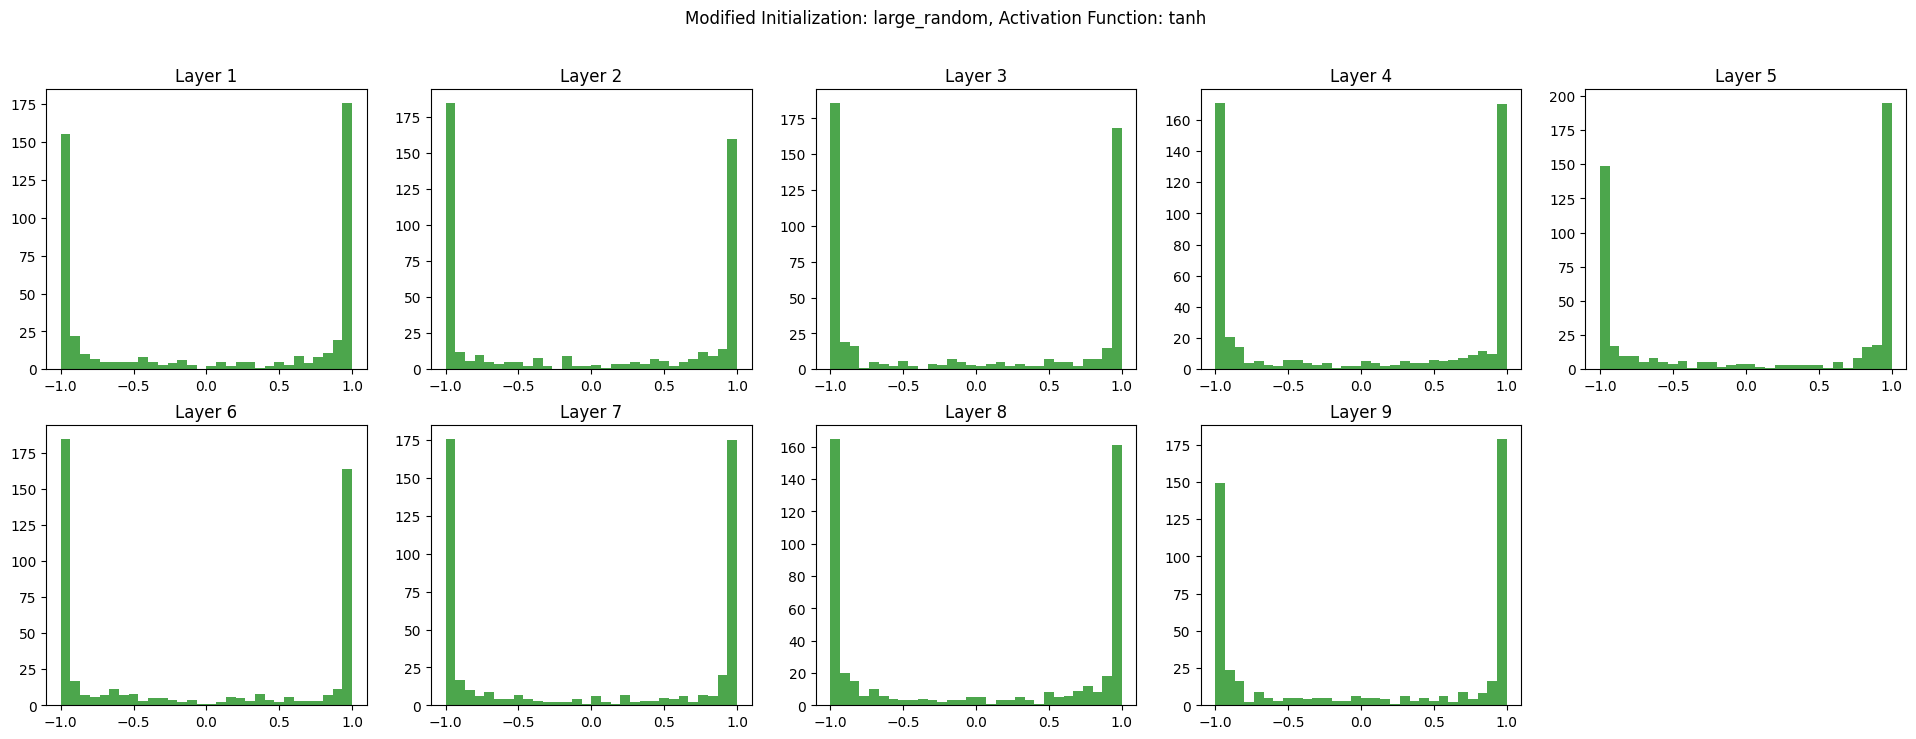

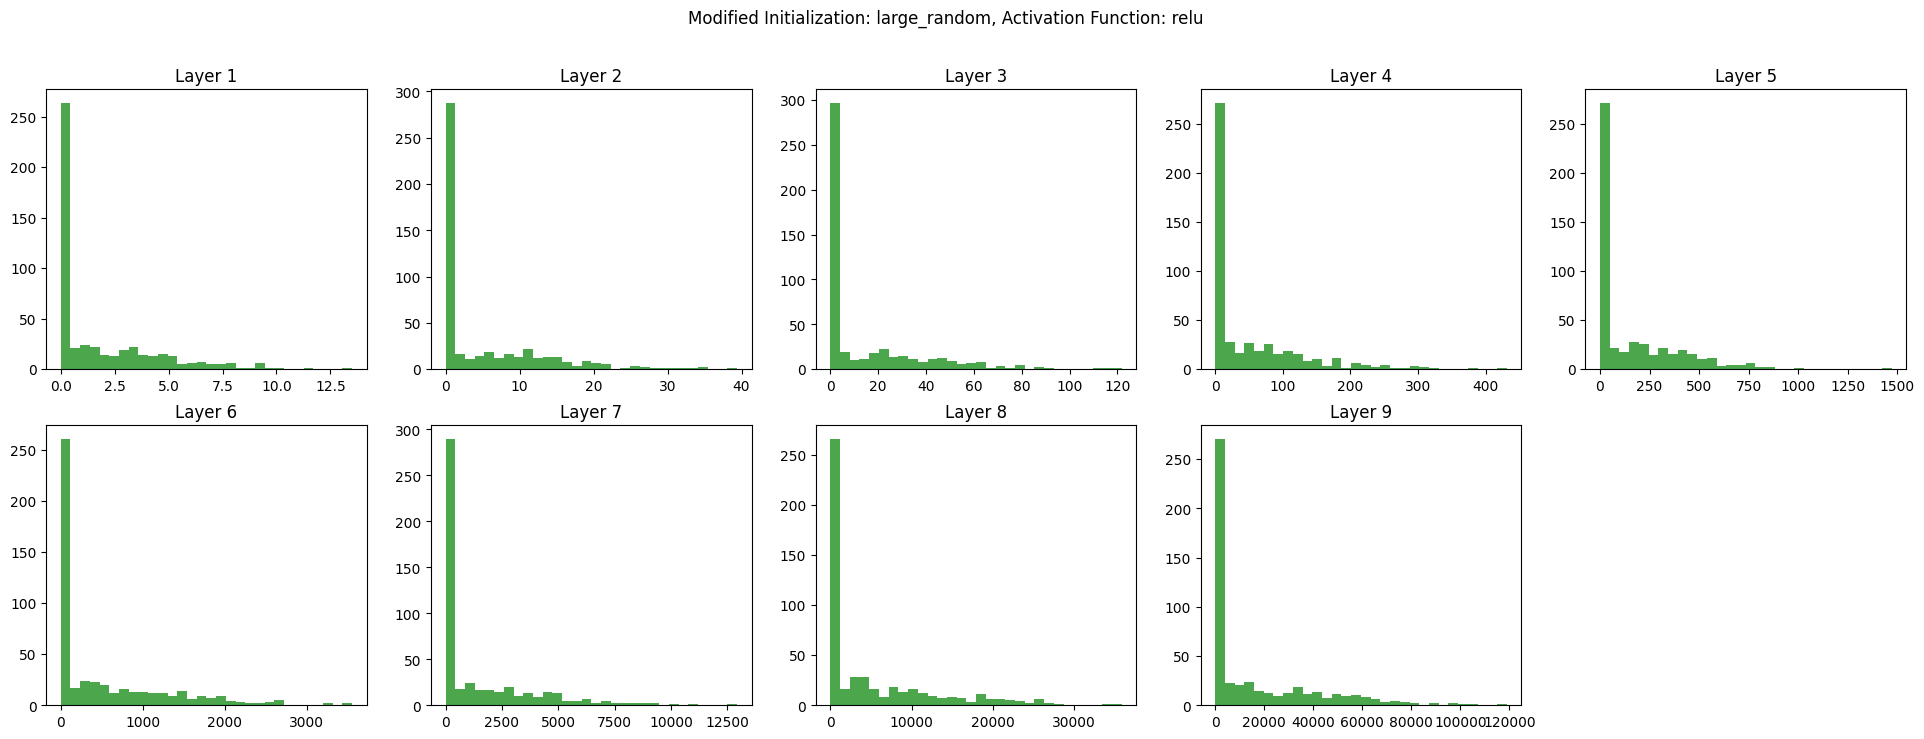

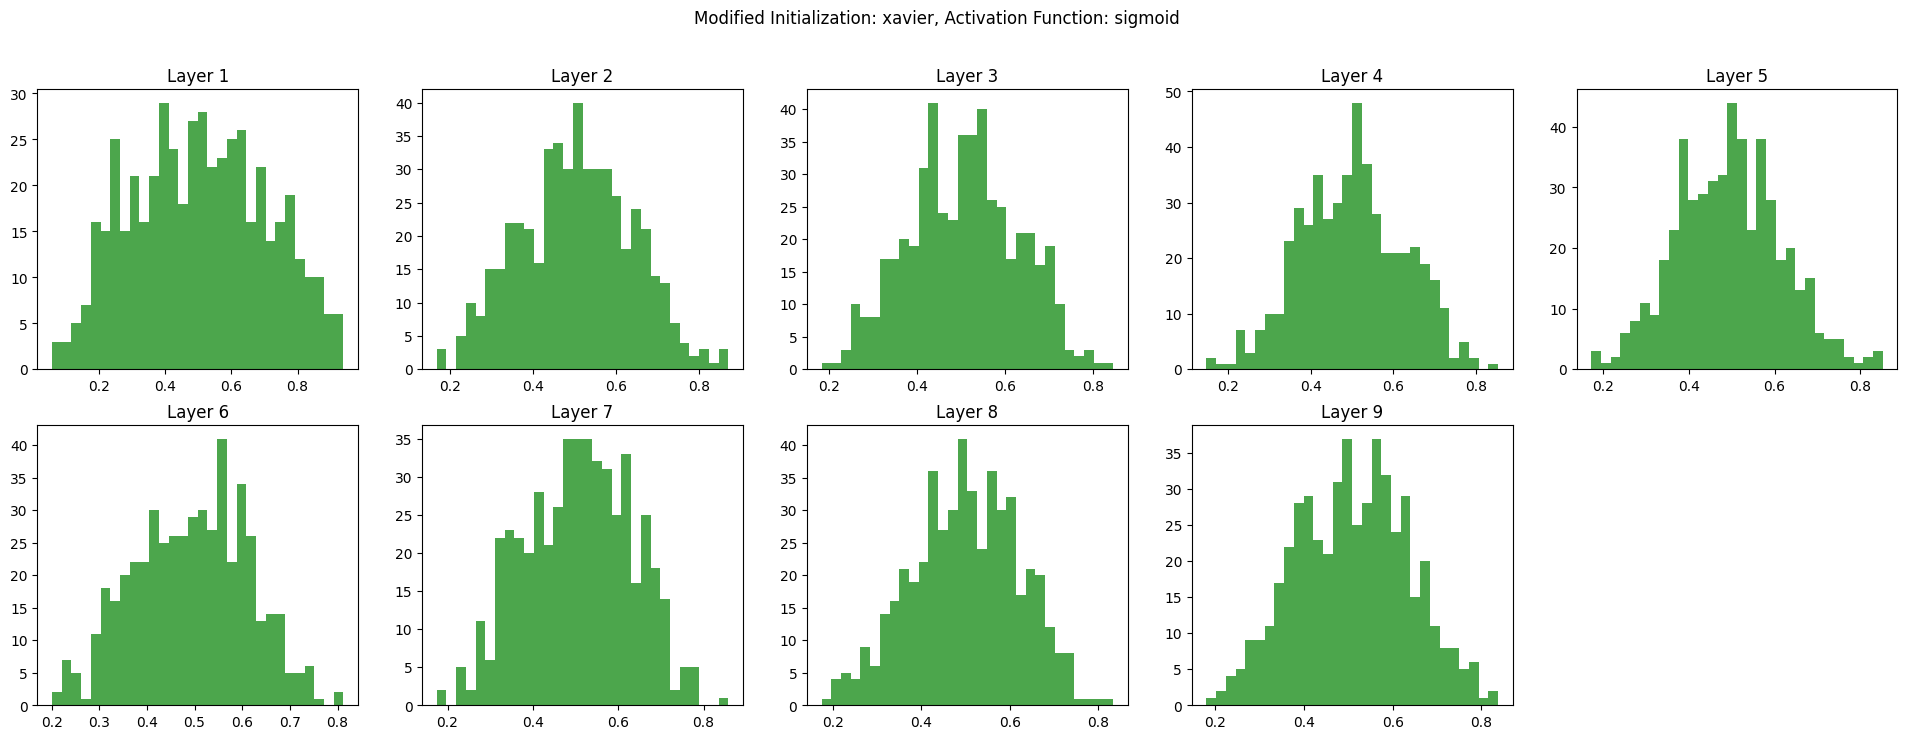

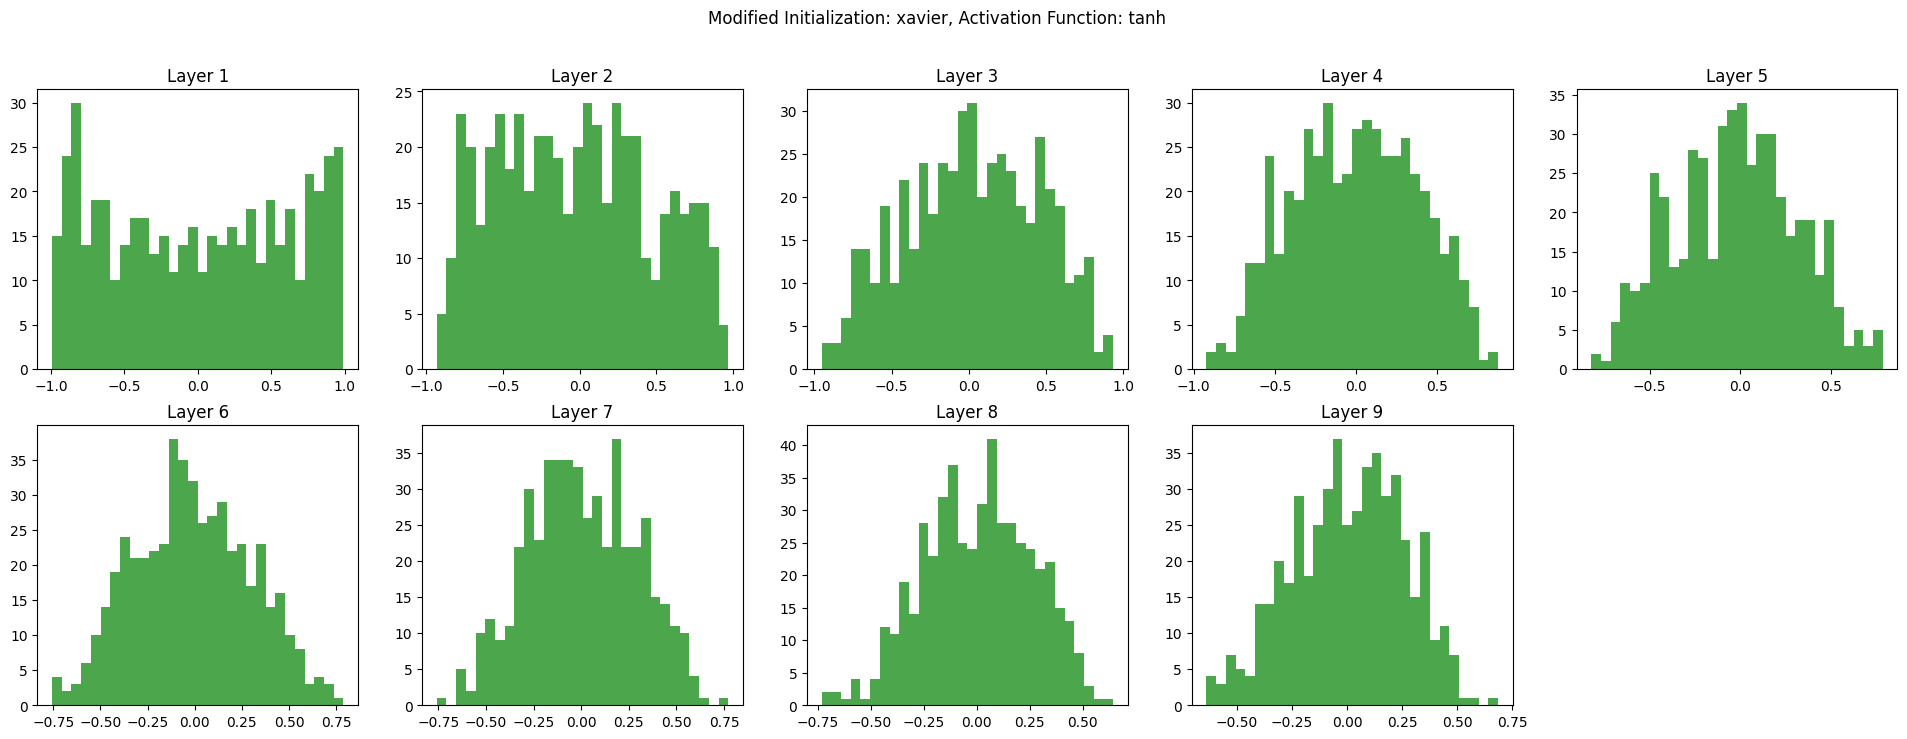

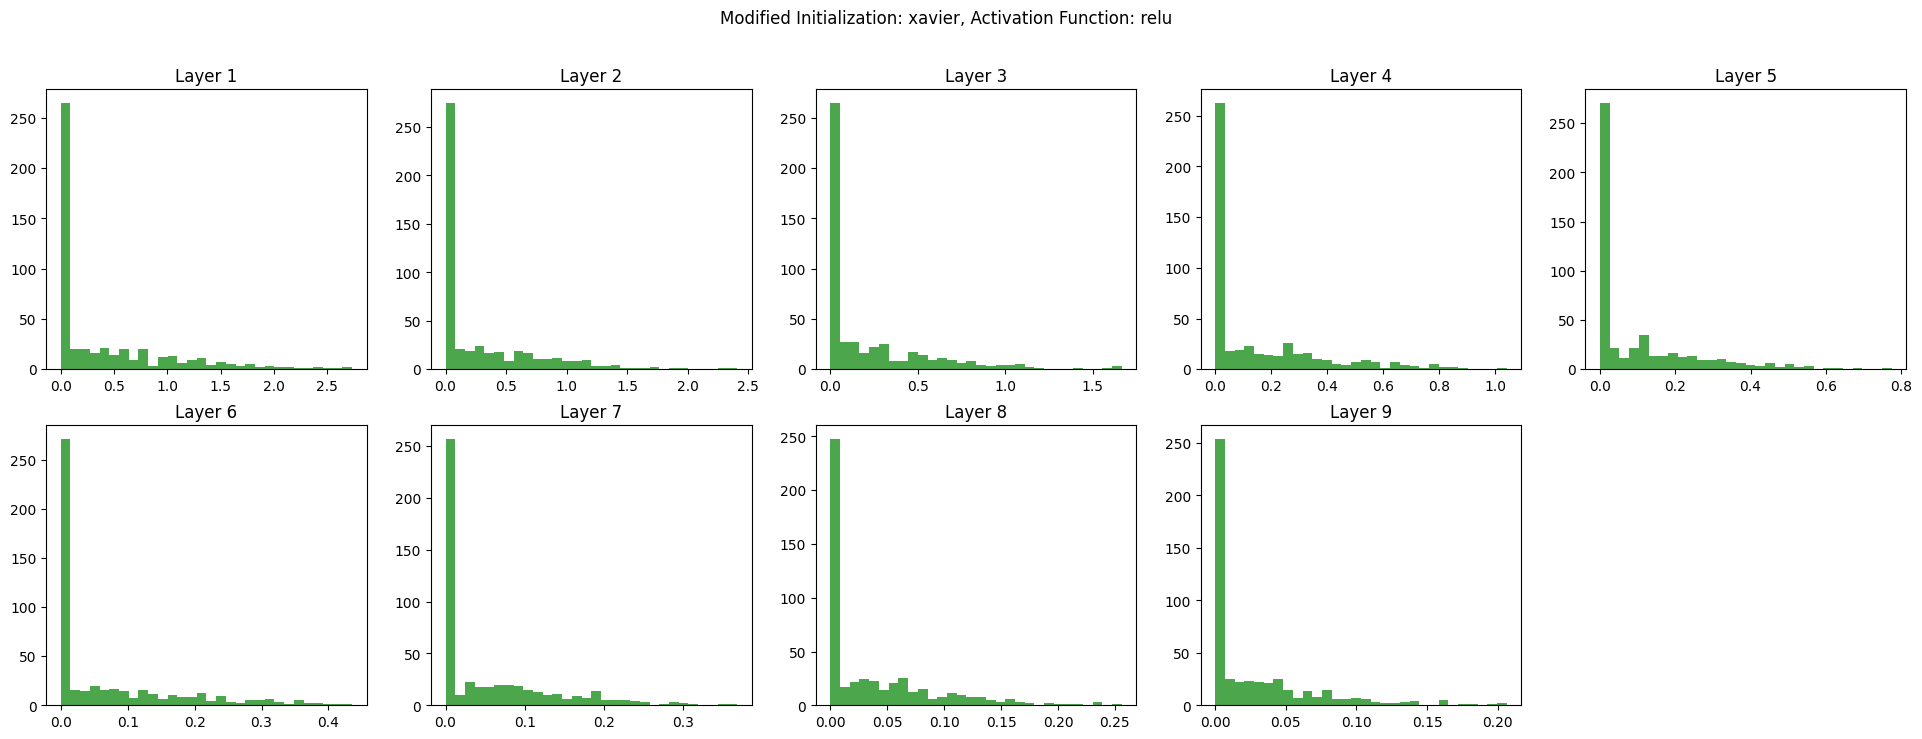

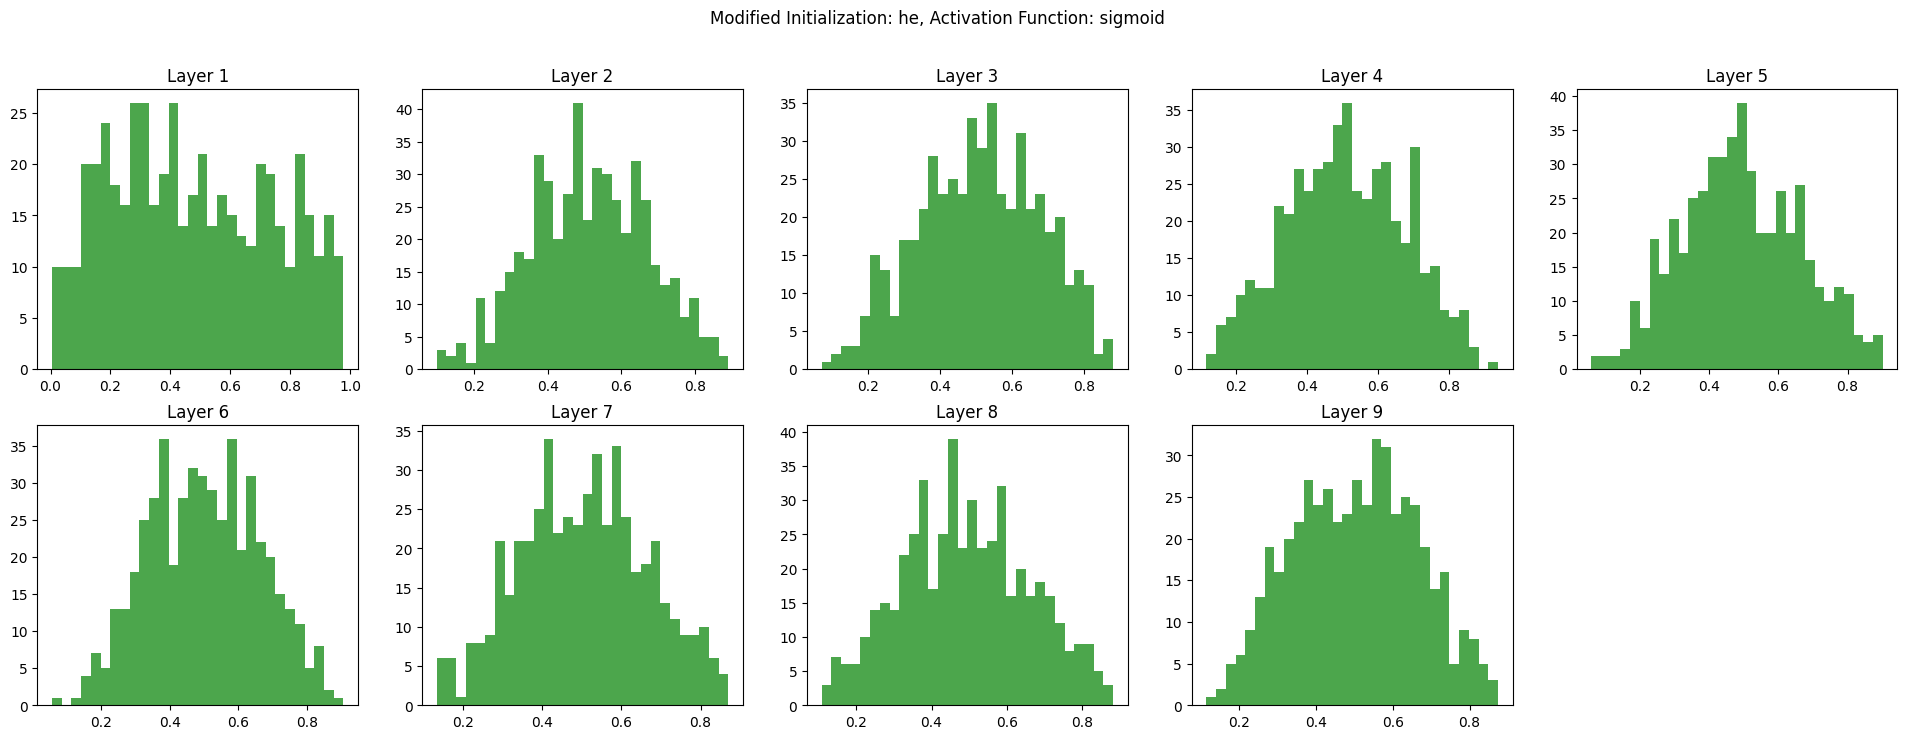

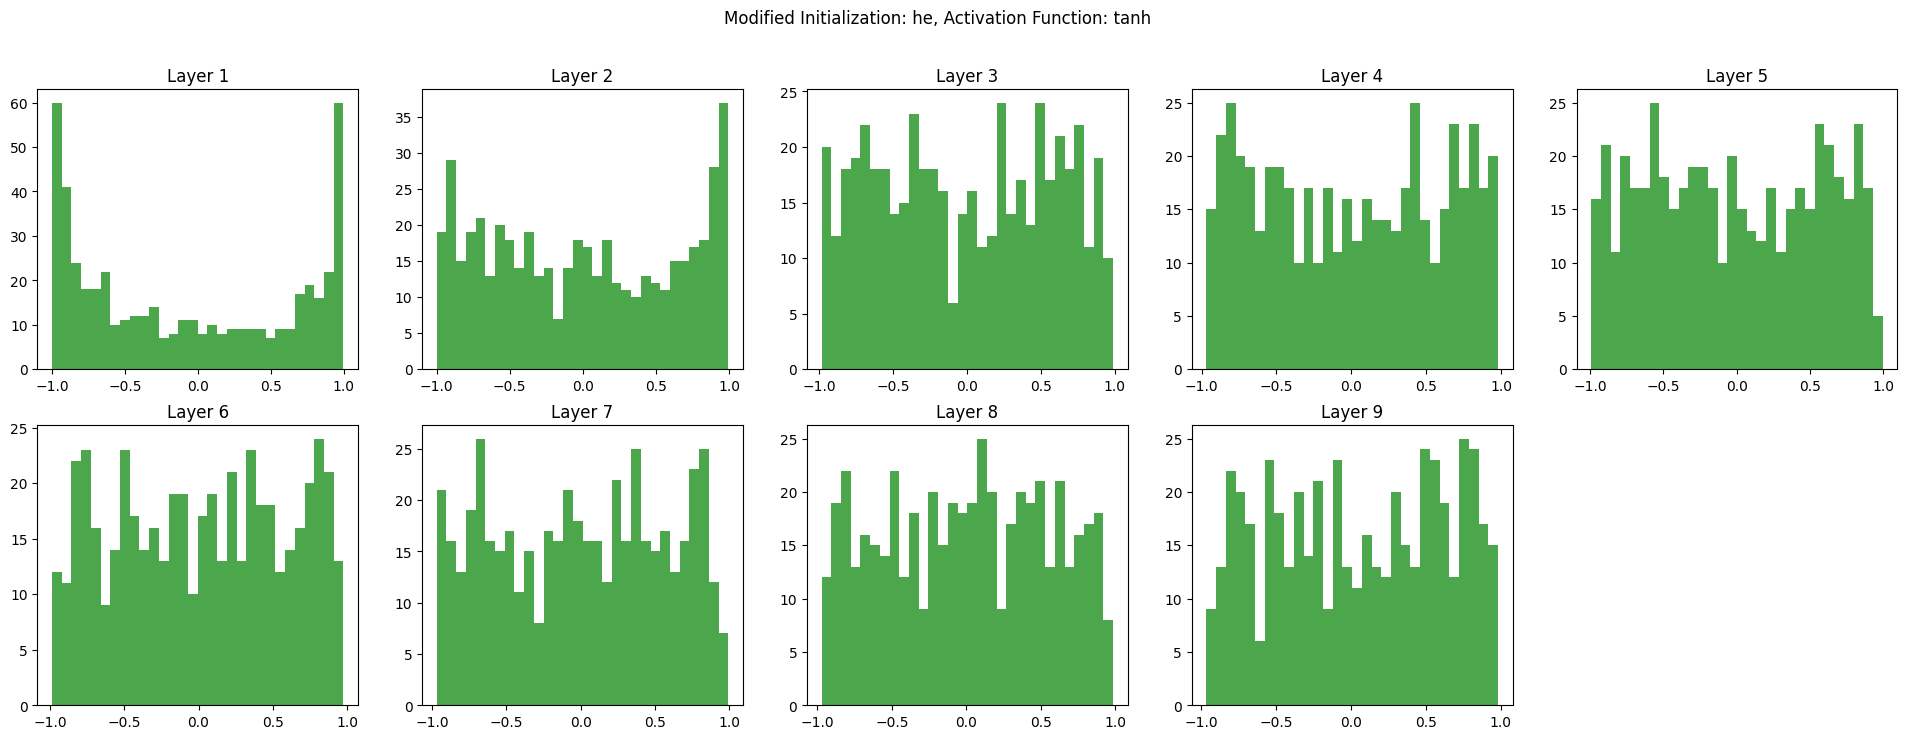

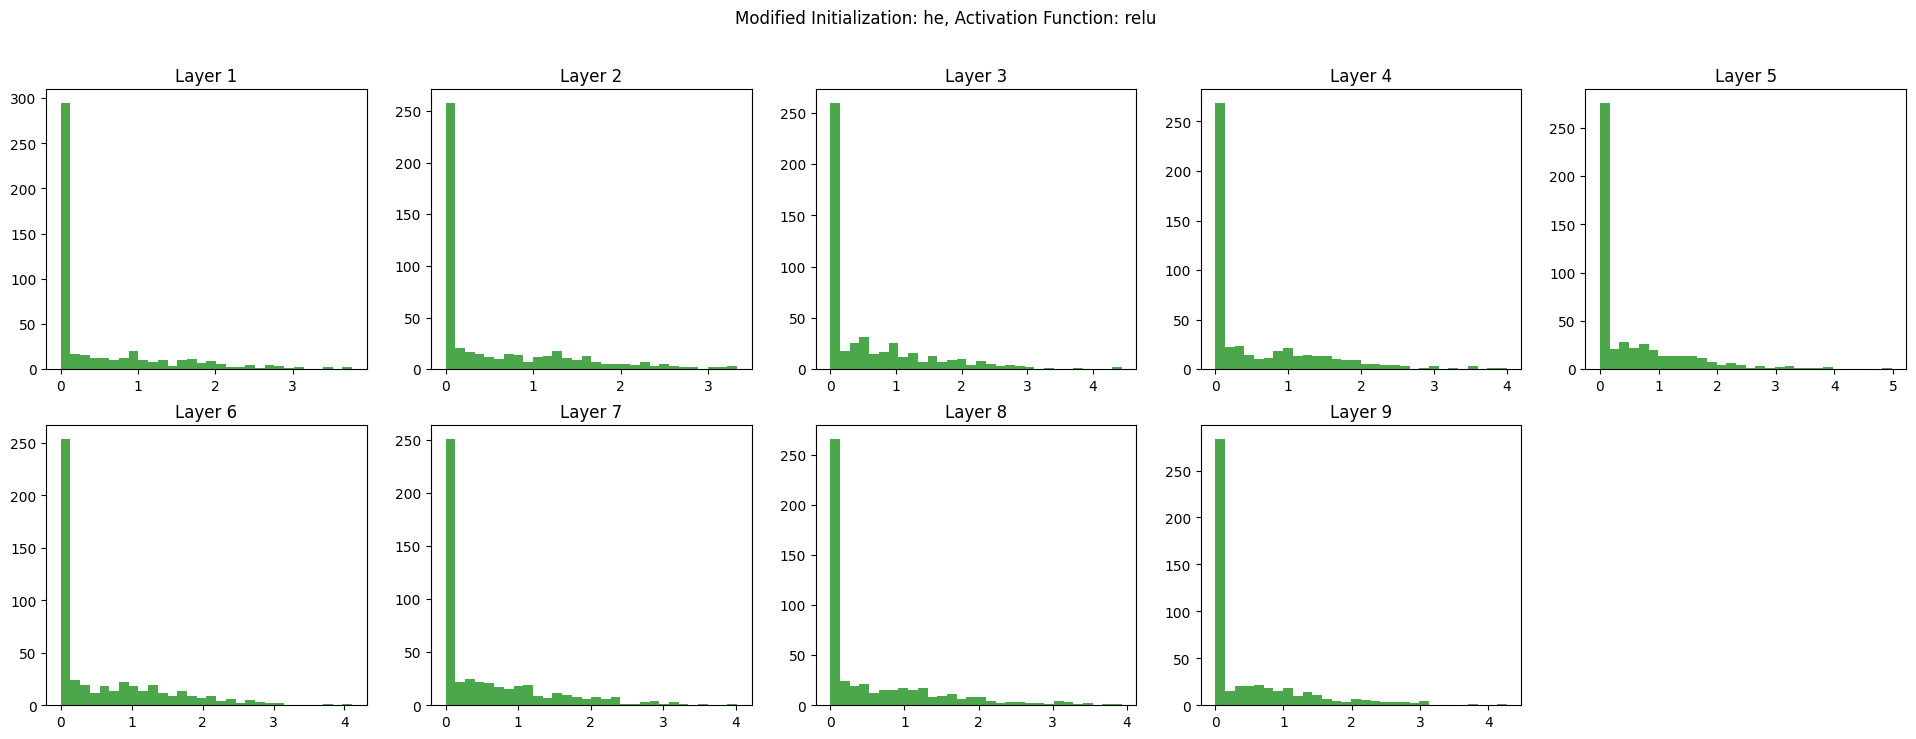

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_weights(method, layer_sizes):
    weights = {f'W{i}': initialization_strategy(method, layer_sizes[i-1], layer_sizes[i])
               for i in range(1, len(layer_sizes))}
    return weights

def initialization_strategy(method, input_connections, output_connections):
    if method == "zeros":
        return np.zeros((output_connections, input_connections))
    elif method == "small_random":
        return np.random.randn(output_connections, input_connections) * 0.02
    elif method == "large_random":
        return np.random.randn(output_connections, input_connections) * 0.2
    elif method == "xavier":
        scale = np.sqrt(2 / (input_connections + output_connections))
        return np.random.randn(output_connections, input_connections) * scale
    elif method == "he":
        scale = np.sqrt(2 / input_connections)
        return np.random.randn(output_connections, input_connections) * scale

def forward_pass_all_layers(inputs, weights, activation_func):
    activations = [inputs]
    for i in range(1, len(weights) + 1):
        z = np.dot(weights[f'W{i}'], activations[-1])
        a = activation_func(z)
        activations.append(a)
    return activations

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

# Network configuration
layer_sizes = [500] * 10  # 10 layers, each with 500 neurons
inputs = np.random.randn(500, 1)

# Weights initialization methods
initialization_methods = ["zeros", "small_random", "large_random", "xavier", "he"]

# Activation functions
activation_functions = [sigmoid, tanh, relu]

# Plotting
for method in initialization_methods:
    weights = initialize_weights(method, layer_sizes)
    for activation_func in activation_functions:
        activations = forward_pass_all_layers(inputs, weights, activation_func)
        # Plot histograms of activations for each layer
        num_layers = len(activations) - 1
        num_cols = min(num_layers, 5)
        num_rows = (num_layers - 1) // num_cols + 1

        plt.figure(figsize=(24, 8))

        for i, a in enumerate(activations[1:]):  # to skip the input layer
            plt.subplot(num_rows, num_cols, i + 1)
            plt.hist(a.ravel(), bins=30, color='green', alpha=0.7)
            plt.title(f'Layer {i+1}')

        plt.suptitle(f'Modified Initialization: {method}, Activation Function: {activation_func.__name__}')
        plt.show()
